<a href="https://colab.research.google.com/github/Areeff10/Breast-cancer-prediction/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING**

## Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

## Loading the dataset


In [2]:
dataset=pd.read_csv("/content/breast cancer.csv")
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Exploratory Data Analysis (EDA)

In [3]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
dataset.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
map={'M':0,'B':1}
dataset["diagnosis_int"]=dataset["diagnosis"].map(map)

In [7]:
dataset.drop(["diagnosis"],axis=1,inplace=True)
dataset.drop('Unnamed: 32', axis=1, inplace=True)
dataset.drop('id',axis=1,inplace=True)

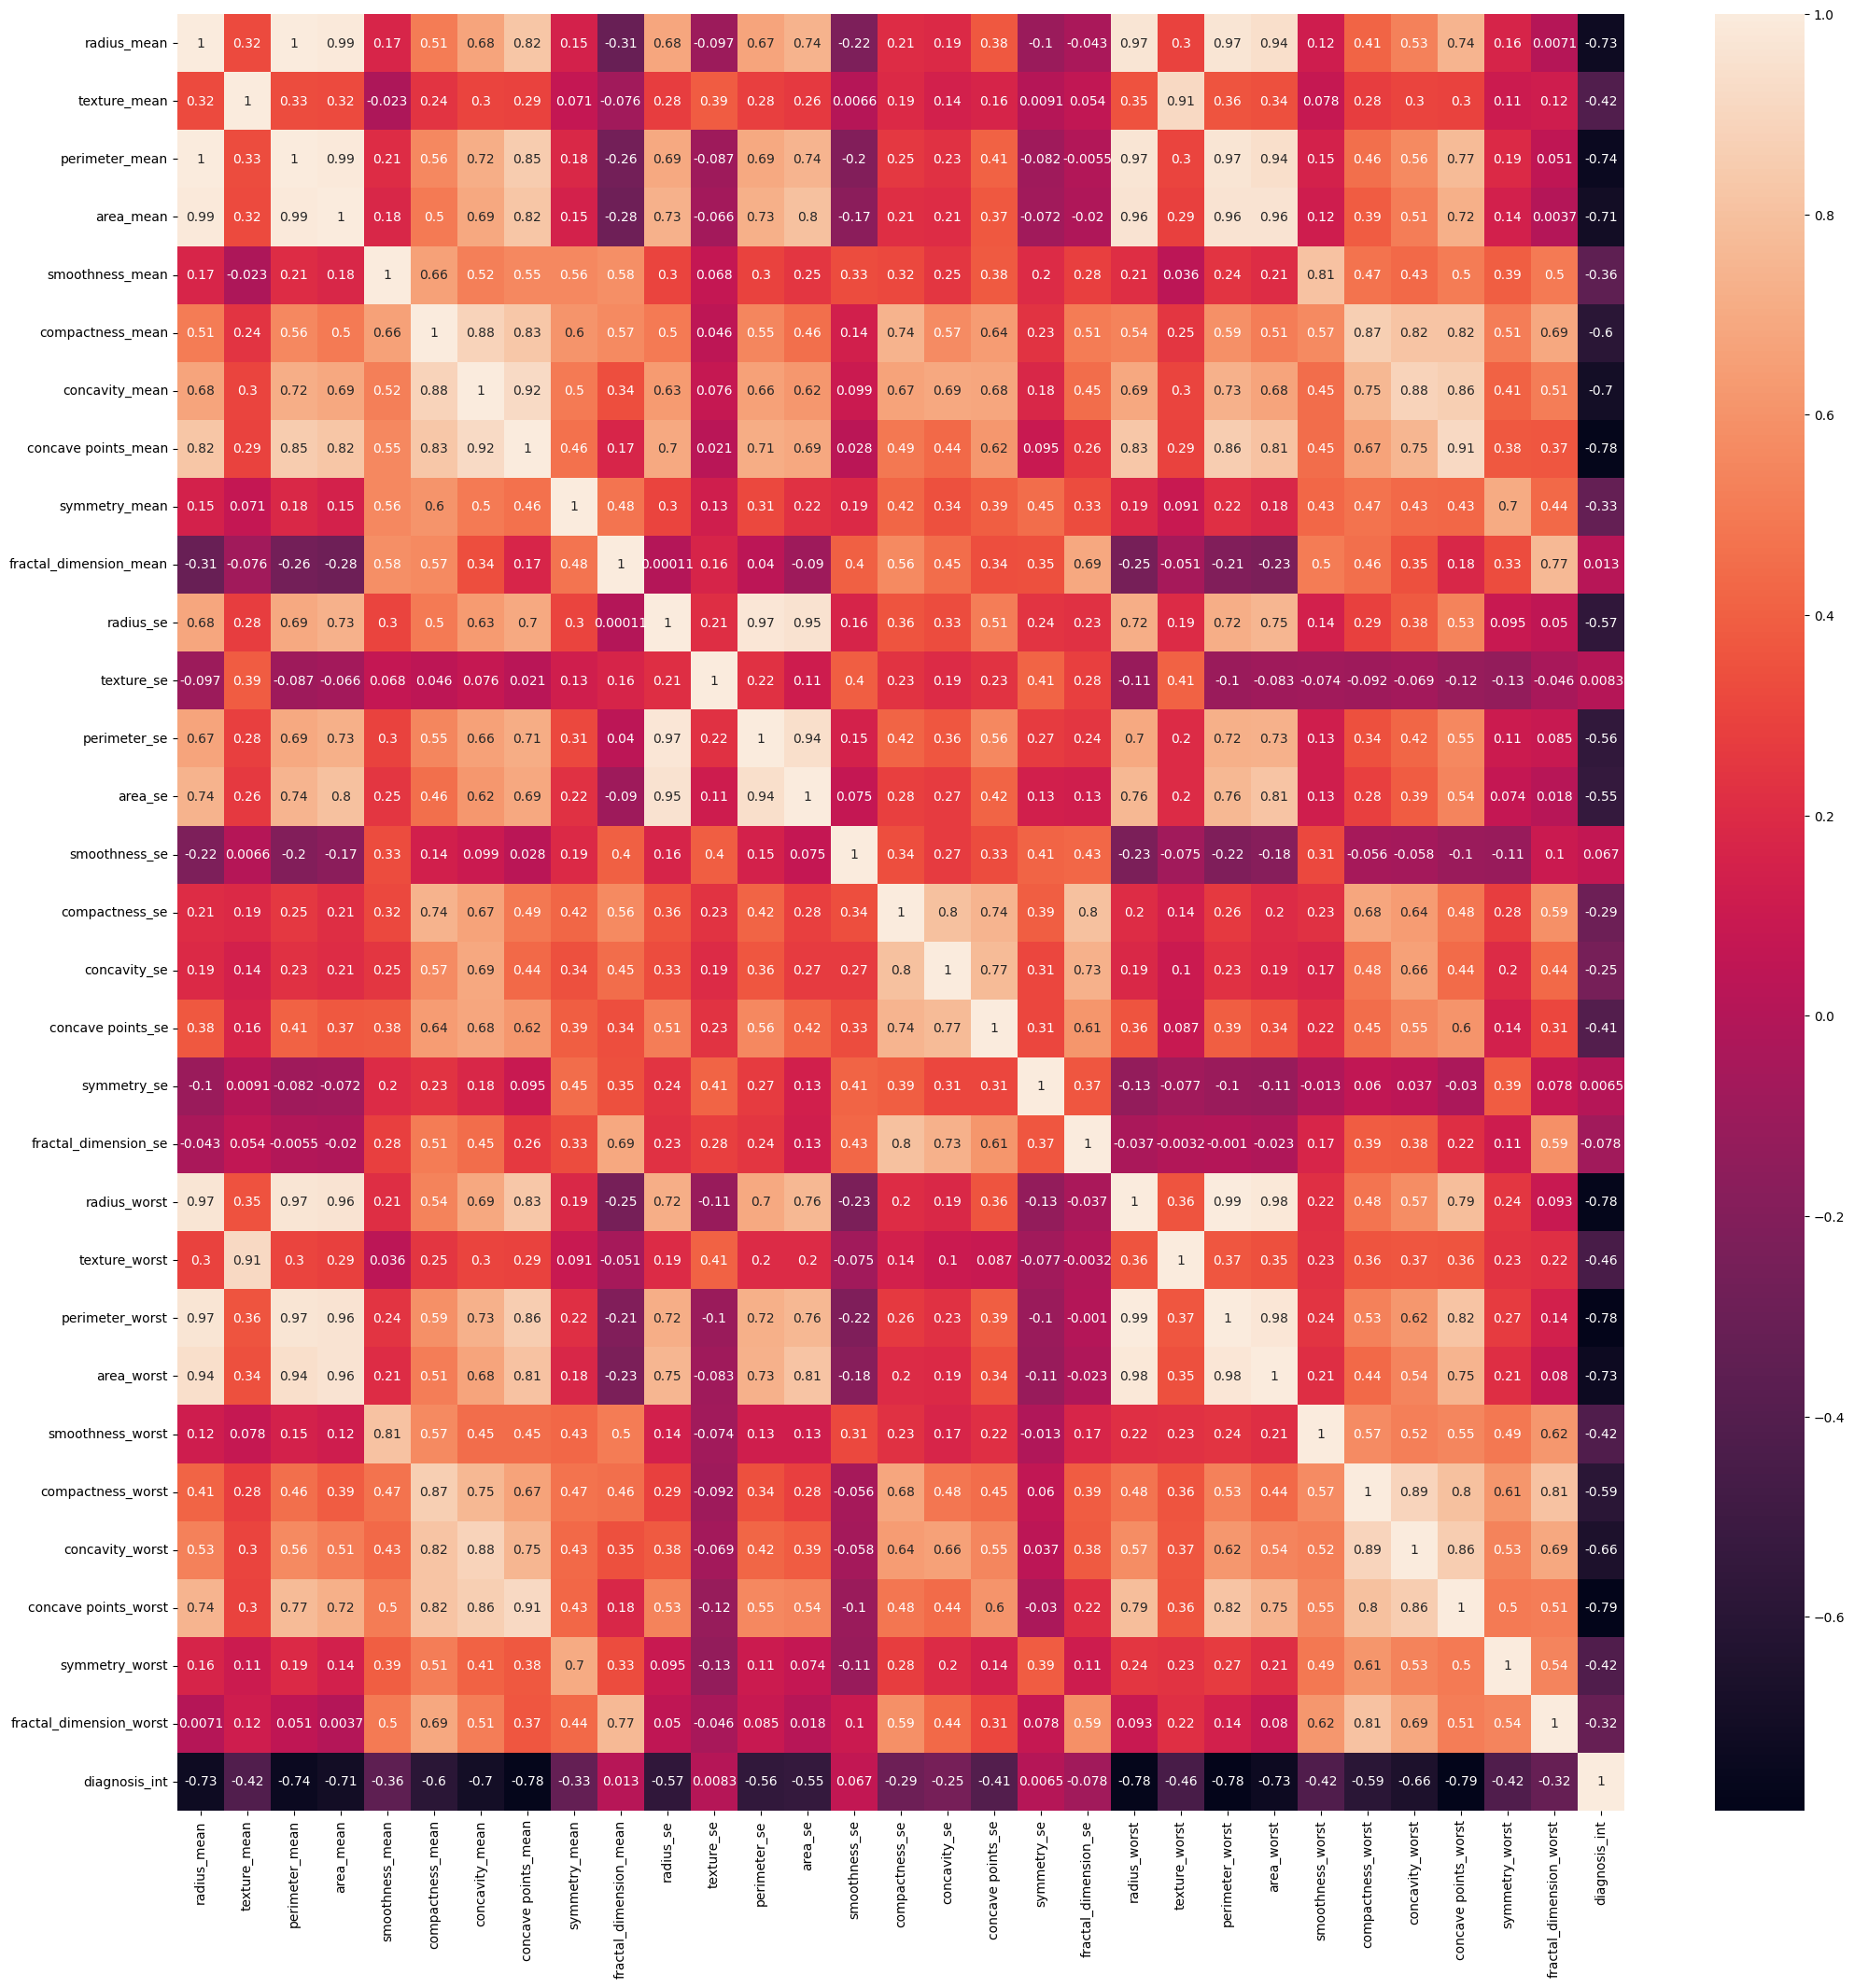

In [14]:
plt.figure(figsize=(25, 25))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [8]:
input_data=dataset[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
output_data=dataset['diagnosis_int']

## Exploratory Data Analysis (EDA)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

## Logistic Regression

In [10]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
print("accuracy of test data:",lr.score(x_test,y_test),"\naccuracy of train data:",lr.score(x_train,y_train))

accuracy of test data: 0.9649122807017544 
accuracy of train data: 0.9472527472527472


## Verifying the model's performance through application

In [12]:
new_data=new_data = [[20.57, 17.77, 132.90, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667,
             0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532,
             24.99, 23.41, 158.80, 1956.0, 0.1238, 0.1866, 0.2416, 0.1860, 0.2750, 0.08902]]

In [13]:
if lr.predict(new_data)[0]==0:
  print("M")
else:
  print("B")


M


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


-------------------------------------------------------------------------------------

# **DEEP LEARNING**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dataset=pd.read_csv('/content/breast cancer.csv')
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
dataset.shape

(569, 32)

In [ ]:
dataset.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [ ]:
map={'M':1, 'B':0}
dataset['diagnosis']=dataset['diagnosis'].map(map)
dataset.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [ ]:
input_data=dataset.iloc[:,1:]
output_data=dataset['diagnosis']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,random_state=42,test_size=0.2)

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
ann=Sequential()
ann.add(Dense(units=11,activation='relu'))
ann.add(Dense(units=8,activation='relu'))
ann.add(Dense(units=4,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model=ann.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3936 - loss: 0.6769 - val_accuracy: 0.4386 - val_loss: 0.6443
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4575 - loss: 0.6338 - val_accuracy: 0.5088 - val_loss: 0.6095
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5959 - loss: 0.5998 - val_accuracy: 0.6579 - val_loss: 0.5801
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7031 - loss: 0.5551 - val_accuracy: 0.7807 - val_loss: 0.5512
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7771 - loss: 0.5533 - val_accuracy: 0.8333 - val_loss: 0.5264
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8315 - loss: 0.5311 - val_accuracy: 0.8509 - val_loss: 0.5059
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8760 - loss: 0.4959 - val_accuracy: 0.8860 - val_loss: 0.4897
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9159 - loss: 0.4862 - val_accuracy: 0.9298 - 

In [ ]:
accuracy_score(y_test,ann.predict(x_test).round())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


0.9736842105263158

In [ ]:
accuracy_score(y_train,ann.predict(x_train).round())

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.9912087912087912

In [ ]:
f1_score(y_train,ann.predict(x_train).round())

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.9880239520958084

In [ ]:
model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

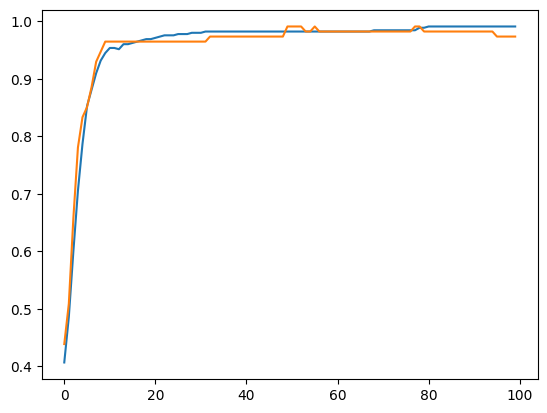

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])

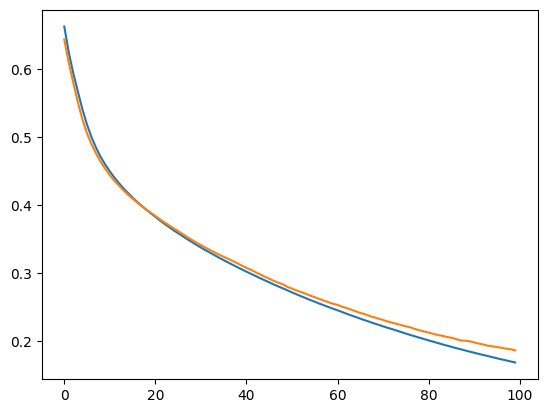

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])